In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from tqdm import tqdm

In [14]:
country_list = ["BR_A001", "NZ_A001", "NZ_A002", "US_A001", "ZA_A001"]
# country_list = ["BR_A001"]

for country_folder in country_list:
        mask_folder = "../data/" + country_folder + "/Mask"
        for wv_ in os.listdir(mask_folder): # WV01, WV02, WV03
                
            with open("mask_stat/"+country_folder+"_"+wv_+"_mask_stat.txt", "w") as f:
                
                wv_folder = mask_folder + "/" + wv_
                for file_folder in os.listdir(wv_folder):
                    for mask in os.listdir(wv_folder + "/" + file_folder):

                        if mask.startswith("ShadowMask") and len(mask)==19:
                        # if mask.startswith("OcclusionMask") and len(mask)==22:

                            mask_path = wv_folder + "/" + file_folder + "/" + mask
                            mask_tif = Image.open(mask_path)
                            mask_tif = np.array(mask_tif)
                            unique, counts = np.unique(mask_tif, return_counts=True)
                            
                            # get number of all pixels
                            total = mask_tif.shape[0] * mask_tif.shape[1]

                            #write file_folder, counts, total into mask_stat.txt, with , as separator
                            f.write(file_folder + ", " + ', '.join(str(num) for num in counts) + ", " + str(total) + "\n")

                            # print(file_folder, unique, counts)

In [10]:
country_list = ["BR_A001", "NZ_A001", "NZ_A002", "US_A001", "ZA_A001"]
satellite_list = ["WV01", "WV02", "WV03"]

all_nodata = []
all_num = 0
all_data = {}

# country level
for country_folder in country_list:
        country_num = 0
        wv_num = []
        country_nodata = []

        # satellite level
        for wv_ in satellite_list:
                # read mask_stat.txt line by line as a list with separator ,
                wv_nodata = []

                with open("mask_stat/"+country_folder+"_"+wv_+"_mask_stat.txt", "r") as f:
                        lines = f.readlines()
                        wv_num.append(len(lines))

                        for line in lines:
                                line = line.split(", ")
                                file = line[0]

                                total = line[-1]
                                nodata_percentage = int(line[-2]) / int(total) * 100
                                wv_nodata.append(nodata_percentage)

                                # create a dictionary with key as file name and value as nodata percentage
                                if file not in all_data:
                                        all_data[file] = []
                                all_data[file].append({"country": country_folder, "satellite": wv_, "nodata_percentage": nodata_percentage})
                
                country_nodata.extend(wv_nodata)
                country_num += len(lines)

        # print info in satellite level
        for i in range(len(wv_num)):
                print(country_folder + " with " + satellite_list[i] + " -- image number: " + str(wv_num[i]))

        all_num += country_num
        all_nodata.extend(country_nodata)

        # print info in country level
        print(country_folder + " -- total image number: " + str(country_num))

print("Total number of images: " + str(all_num))

BR_A001 with WV01 -- image number: 49
BR_A001 with WV02 -- image number: 180
BR_A001 with WV03 -- image number: 65
BR_A001 -- total image number: 294
NZ_A001 with WV01 -- image number: 80
NZ_A001 with WV02 -- image number: 161
NZ_A001 with WV03 -- image number: 82
NZ_A001 -- total image number: 323
NZ_A002 with WV01 -- image number: 96
NZ_A002 with WV02 -- image number: 143
NZ_A002 with WV03 -- image number: 68
NZ_A002 -- total image number: 307
US_A001 with WV01 -- image number: 95
US_A001 with WV02 -- image number: 167
US_A001 with WV03 -- image number: 17
US_A001 -- total image number: 279
ZA_A001 with WV01 -- image number: 27
ZA_A001 with WV02 -- image number: 98
ZA_A001 with WV03 -- image number: 56
ZA_A001 -- total image number: 181
Total number of images: 1384


1384


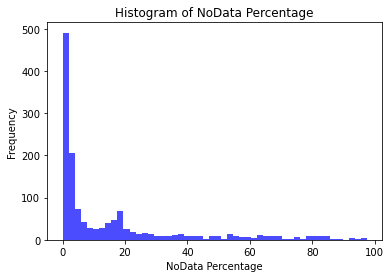

In [7]:
print(len(all_nodata))

# plot histogram
plt.hist(all_nodata, bins=50, alpha=0.7, color='b')
plt.xlabel('NoData Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of NoData Percentage')
plt.show()

In [14]:
print(all_data) 

# find the smallest nodata percentage and its corresponding country and satellite
min_nodata = 100
min_country = ""
min_satellite = ""
for file in all_data:
        for data in all_data[file]:
                if data["nodata_percentage"] < min_nodata:
                        min_nodata = data["nodata_percentage"]
                        min_country = data["country"]
                        min_satellite = data["satellite"]
print("The smallest nodata percentage is " + str(min_nodata) + " in " + min_country + " with " + min_satellite)

{'014886600010_01_P002': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 5.343545110452261}], '014886625010_01_P001': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 15.391947455190655}], '014886625010_01_P002': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 66.05861894126514}], '014886630010_01_P005': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 9.096553357880719}], '014886654010_01_P005': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 23.382539610063468}], '014886671010_01_P001': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 11.225618389947757}], '014886671010_01_P002': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 68.01244960400787}], '014886672010_01_P001': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 17.946097004948687}], '014886672010_01_P002': [{'country': 'BR_A001', 'satellite': 'WV01', 'nodata_percentage': 58.38303023397388